# ${}^{4}{\rm He}$

The interaction is defined in `helium4.py`. It is nonlocal, and so is the counterterm. We will use it to tune the scattering length over a range of short-distance cutoffs, $R$.

In [1]:
import numpy as np
from scipy import optimize

import mu2

import helium4plus as he4

In [2]:
large_R_rg_flow = np.loadtxt('datfiles/he4plus_LO_nonlocal_rg_flow.txt')

In [8]:
ELL = 0
R_MAX = large_R_rg_flow[-1, 0]
R_MIN = he4.BETA6/12
nR = 50
Rs = 2/np.linspace(2/R_MAX, 2/R_MIN, nR)
gs = np.empty(nR)
b2s = np.empty(nR)
r0s = np.empty(nR)

In [9]:
momenta = np.linspace(0.01/he4.BETA6, 0.3/he4.BETA6, 30)
X = he4.FACTOR * he4.BETA6 # K•Å^3

def inverse_a0_diff(g, sys):
    a0, _ = sys.a0_and_r0(g, 0, momenta, use_c=True)
    return (1/he4.A0 - 1/a0)*he4.A0

In [10]:
s = he4.Helium4System(Rs[0], ELL)

In [16]:
guess = large_R_rg_flow[-1, 1]
s.a0_and_r0(guess, 0, momenta, use_c=True), s.bound_state_spectrum(guess, 0)

((100.0000000020215, 7.388670797772099),
 array([-1.31180716e-03, -1.61114747e+02, -2.13931374e+06]))

In [17]:
for i in range(nR):
    R = Rs[i]
    s = he4.Helium4System(R, ELL)
    result = optimize.fsolve(inverse_a0_diff, guess, args=(s), factor=0.1)
    g = result[0]
    a0, r0 = s.a0_and_r0(g, 0, momenta)
    
    if np.abs((he4.A0 - a0)/he4.A0) < 1e-4:
        e2s = s.bound_state_spectrum(g, 0)
        gs[i] = g
        r0s[i] = r0
        b2s[i] = np.abs(e2s[0])
        print(f'i = {i}  R = {R:.4f}  g = {g/X:.4e} X  a0 = {a0:.4e}  r0 = {r0:.4e}  b2 = {np.abs(e2s[0])}')
    else:
        break

i = 0  R = 0.6927  g = 2.7877e+04 X  a0 = 1.0000e+02  r0 = 7.3887e+00  b2 = 0.001311807159433859
i = 1  R = 0.6857  g = 2.9196e+04 X  a0 = 1.0000e+02  r0 = 7.3852e+00  b2 = 0.001311752284529022
i = 2  R = 0.6788  g = 3.0677e+04 X  a0 = 1.0000e+02  r0 = 7.3818e+00  b2 = 0.0013116982809370163
i = 3  R = 0.6721  g = 3.2391e+04 X  a0 = 1.0000e+02  r0 = 7.3784e+00  b2 = 0.0013116456358603153
i = 4  R = 0.6655  g = 3.4455e+04 X  a0 = 1.0000e+02  r0 = 7.3752e+00  b2 = 0.0013115948220837521
i = 5  R = 0.6590  g = 3.7096e+04 X  a0 = 1.0000e+02  r0 = 7.3721e+00  b2 = 0.0013115462611972546
i = 6  R = 0.6527  g = 4.0806e+04 X  a0 = 1.0000e+02  r0 = 7.3692e+00  b2 = 0.0013115003108401253
i = 7  R = 0.6465  g = 4.6882e+04 X  a0 = 1.0000e+02  r0 = 7.3665e+00  b2 = 0.0013114572820055851


In [18]:
restart = 8
s = he4.Helium4System(Rs[restart], ELL)

In [36]:
guess = 6.025e4*X
inverse_a0_diff(guess, s)

-3.4071743988152436e-05

In [37]:
for i in range(restart, nR):
    R = Rs[i]
    s = he4.Helium4System(R, ELL)
    result = optimize.fsolve(inverse_a0_diff, guess, args=(s), factor=0.1)
    g = result[0]
    a0, r0 = s.a0_and_r0(g, 0, momenta)
    
    if np.abs((he4.A0 - a0)/he4.A0) < 1e-4:
        e2s = s.bound_state_spectrum(g, 0)
        gs[i] = g
        r0s[i] = r0
        b2s[i] = np.abs(e2s[0])
        print(f'i = {i}  R = {R:.4f}  g = {g/X:.4e} X  a0 = {a0:.4e}  r0 = {r0:.4e}  b2 = {np.abs(e2s[0])}')
    else:
        break

i = 8  R = 0.6404  g = 6.0250e+04 X  a0 = 1.0000e+02  r0 = 7.3639e+00  b2 = 0.0013114174211908338
i = 9  R = 0.6344  g = 1.3158e+05 X  a0 = 1.0000e+02  r0 = 7.3616e+00  b2 = 0.0013113796670875283


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [38]:
restart = 10
s = he4.Helium4System(Rs[restart], ELL)

In [52]:
guess = -4.4e4*X
inverse_a0_diff(guess, s)

0.008278827209663546

In [54]:
for i in range(restart, nR):
    R = Rs[i]
    s = he4.Helium4System(R, ELL)
    result = optimize.fsolve(inverse_a0_diff, guess, args=(s), factor=0.1)
    g = result[0]
    a0, r0 = s.a0_and_r0(g, 0, momenta)
    
    if np.abs((he4.A0 - a0)/he4.A0) < 1e-4:
        e2s = s.bound_state_spectrum(g, 0)
        gs[i] = g
        r0s[i] = r0
        b2s[i] = np.abs(e2s[0])
        print(f'i = {i}  R = {R:.4f}  g = {g/X:.4e} X  a0 = {a0:.4e}  r0 = {r0:.4e}  b2 = {np.abs(e2s[0])}')
        guess = g
    else:
        break

i = 10  R = 0.6285  g = -4.4477e+04 X  a0 = 1.0000e+02  r0 = 7.3595e+00  b2 = 0.0013113478993898007
i = 11  R = 0.6228  g = 5.0426e+03 X  a0 = 1.0000e+02  r0 = 7.3576e+00  b2 = 0.0013113183960684715
i = 12  R = 0.6171  g = 1.6768e+04 X  a0 = 1.0000e+02  r0 = 7.3560e+00  b2 = 0.0013112924649417372
i = 13  R = 0.6115  g = 2.2481e+04 X  a0 = 1.0000e+02  r0 = 7.3544e+00  b2 = 0.0013112705338861764
i = 14  R = 0.6061  g = 2.6142e+04 X  a0 = 1.0000e+02  r0 = 7.3534e+00  b2 = 0.0013112510395039262
i = 15  R = 0.6007  g = 2.8868e+04 X  a0 = 1.0000e+02  r0 = 7.3523e+00  b2 = 0.0013112352645365507
i = 16  R = 0.5954  g = 3.1094e+04 X  a0 = 1.0000e+02  r0 = 7.3515e+00  b2 = 0.0013112227503864653
i = 17  R = 0.5903  g = 3.3026e+04 X  a0 = 1.0000e+02  r0 = 7.3509e+00  b2 = 0.0013112128260141518
i = 18  R = 0.5852  g = 3.4776e+04 X  a0 = 1.0000e+02  r0 = 7.3505e+00  b2 = 0.0013112056762119091
i = 19  R = 0.5802  g = 3.6407e+04 X  a0 = 1.0000e+02  r0 = 7.3502e+00  b2 = 0.0013112008913189906
i = 20  R

In [55]:
import matplotlib.pyplot as plt

plt.style.use('science')
gr = 4/3
h = 3

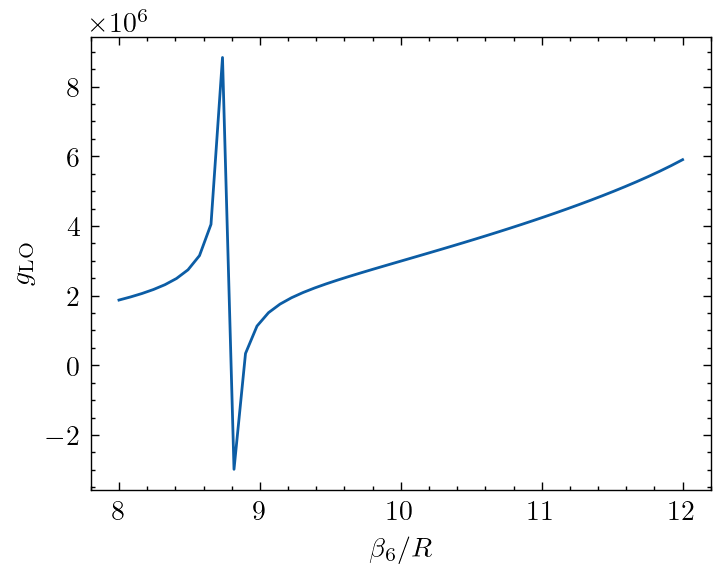

In [56]:
fig, ax = plt.subplots(figsize=(gr*h, h), dpi=200)
fig.patch.set_facecolor('white')

ax.plot(he4.BETA6/Rs, gs)

ax.set_xlabel(r'$\beta_6/R$')
ax.set_ylabel(r'$g_{\rm LO}$');

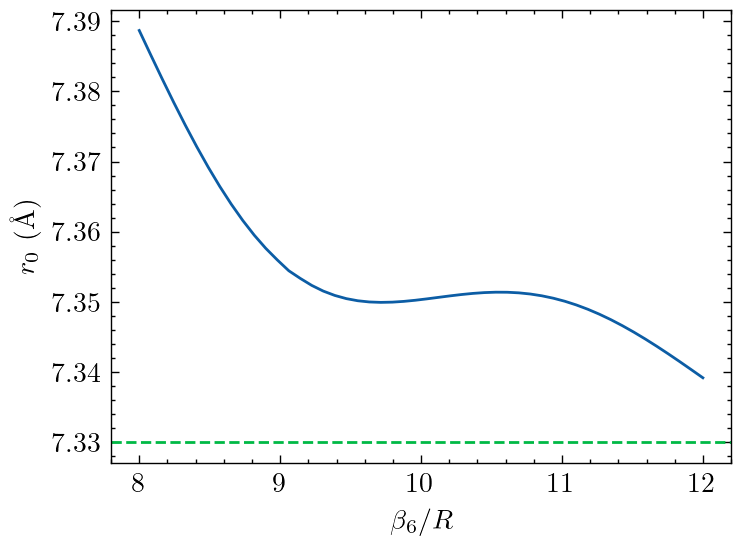

In [57]:
fig, ax = plt.subplots(figsize=(gr*h, h), dpi=200)
fig.patch.set_facecolor('white')

ax.plot(he4.BETA6/Rs, r0s)
ax.axhline(he4.R0, color='C1', linestyle='--')

ax.set_xlabel(r'$\beta_6/R$')
ax.set_ylabel(r'$r_0$ (Å)');

In [58]:
np.savetxt('datfiles/he4plus_LO_nonlocal_rg_flow_small_R.txt', np.vstack((Rs, gs)).T, header='R (Å)  g ()')

In [59]:
np.savetxt('datfiles/he4plus_LO_nonlocal_r0s_small_R.txt', np.vstack((Rs, r0s)).T, header='R (Å)  r_0 (Å)')